# Models Tuning

This notebook was run in VScode to view GridSearchCV progress ([ref](https://www.kaggle.com/questions-and-answers/319408)).

Enable auto-reloading of external modules

In [74]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import dependencies

In [75]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [76]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


In [77]:
import matplotlib
import matplotlib.pyplot as plt

from utils.custom_classes.data_loader import CompasDataset
from utils.model_tuning_utils import *
from configs.config import *

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [78]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment

In [79]:
DATASET_NAME = "COMPAS"

## Loading ACSEmployment data

In [80]:
dataset = CompasDataset("./data/COMPAS.csv")

## Tune hyper-parameters and find the best baseline model

Baseline X_train shape:  (4222, 12)
Baseline X_test shape:  (1056, 12)
X_train_features.columns:  Index(['age_cat_Less than 25_0', 'age_cat_25 - 45_1',
       'age_cat_Greater than 45_0', 'c_charge_degree_M_1',
       'age_cat_Less than 25_1', 'juv_fel_count', 'race_Caucasian',
       'c_charge_degree_F_1', 'c_charge_degree_F_0', 'sex_1',
       'c_charge_degree_M_0', 'sex_0', 'age', 'race_African-American',
       'priors_count', 'age_cat_25 - 45_0', 'age_cat_Greater than 45_1',
       'juv_other_count', 'juv_misd_count'],
      dtype='object')
2023/01/15, 18:34:15: Tuning LogisticRegression...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
2023/01/15, 18:34:17: Tuning for LogisticRegression is finished
####################  COMPAS  ####################
Test model:  LogisticRegression
Test model parameters:
{'max_iter': 50, 'penalty': 'l2', 'solver': 'saga'}

              precision    recall  f1-score   support

           0      0.710     0.704     0.707       585
   

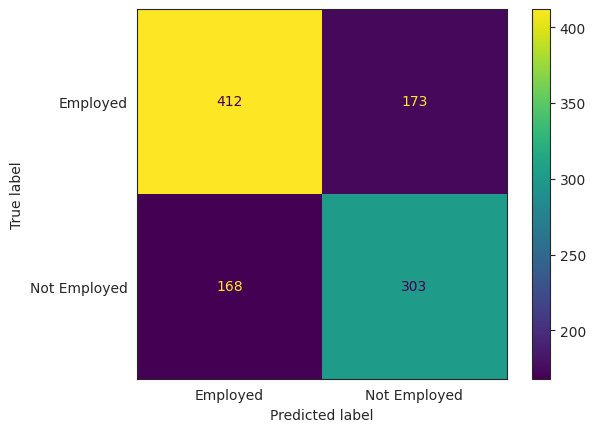

2023/01/15, 18:34:17: Tuning DecisionTreeClassifier...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
2023/01/15, 18:34:18: Tuning for DecisionTreeClassifier is finished
####################  COMPAS  ####################
Test model:  DecisionTreeClassifier
Test model parameters:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.6}

              precision    recall  f1-score   support

           0      0.701     0.766     0.732       585
           1      0.671     0.594     0.631       471

    accuracy                          0.689      1056
   macro avg      0.686     0.680     0.681      1056
weighted avg      0.688     0.689     0.687      1056



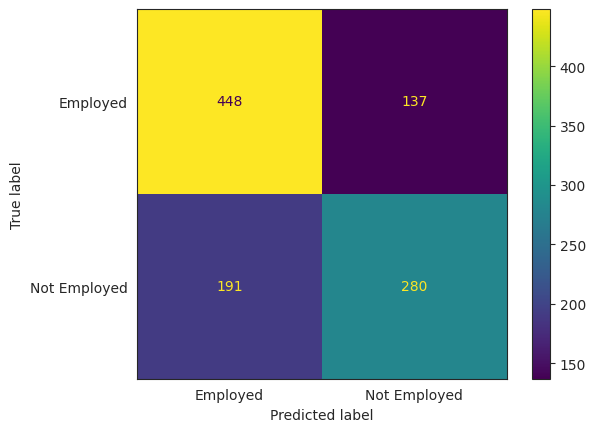

2023/01/15, 18:34:18: Tuning RandomForestClassifier...
Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3; 2/50] START max_iter=50, penalty=none, solver=lbfgs....................
[CV 1/3; 2/50] END max_iter=50, penalty=none, solver=lbfgs; Accuracy_Score: (test=0.653) F1_Score: (test=0.652) total time=   0.0s
[CV 3/3; 11/50] START max_iter=100, penalty=none, solver=newton-cg..............
[CV 3/3; 11/50] END max_iter=100, penalty=none, solver=newton-cg; Accuracy_Score: (test=0.680) F1_Score: (test=0.673) total time=   0.0s
[CV 1/3; 13/50] START max_iter=100, penalty=none, solver=liblinear..............
[CV 1/3; 13/50] END max_iter=100, penalty=none, solver=liblinear; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 13/50] START max_iter=100, penalty=none, solver=liblinear..............
[CV 3/3; 13/50] END max_iter=100, penalty=none, solver=liblinear; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 14/50] START ma

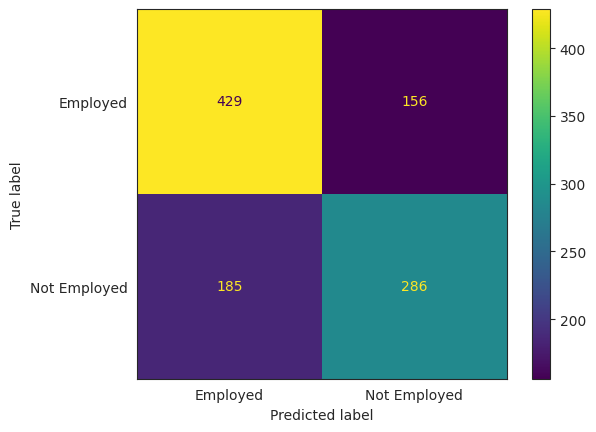

2023/01/15, 18:34:31: Tuning XGBClassifier...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
2023/01/15, 18:34:38: Tuning for XGBClassifier is finished
####################  COMPAS  ####################
Test model:  XGBClassifier
Test model parameters:
{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'objective': 'binary:logistic'}

              precision    recall  f1-score   support

           0      0.710     0.754     0.731       585
           1      0.669     0.618     0.642       471

    accuracy                          0.693      1056
   macro avg      0.690     0.686     0.687      1056
weighted avg      0.692     0.693     0.692      1056



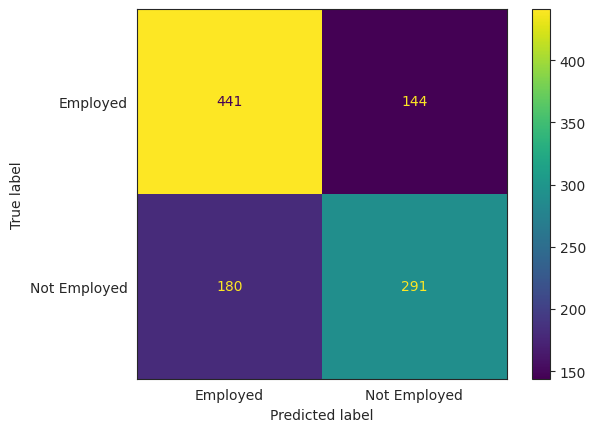

2023/01/15, 18:34:39: Tuning KNeighborsClassifier...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 3/3; 63/144] START max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 3/3; 63/144] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.672) F1_Score: (test=0.668) total time=   0.2s
[CV 1/3; 64/144] START max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/3; 64/144] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100; Accuracy_Score: (test=0.647) F1_Score: (test=0.644) total time=   0.5s
[CV 3/3; 71/144] START max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 3/3; 71/144] END max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50; Accuracy_Score: (test=0.672) F1_Score: (test=0.668) total time=   0.2s
[CV 1/3; 72/144] START max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 1/3; 72/144] END max_depth=4, m

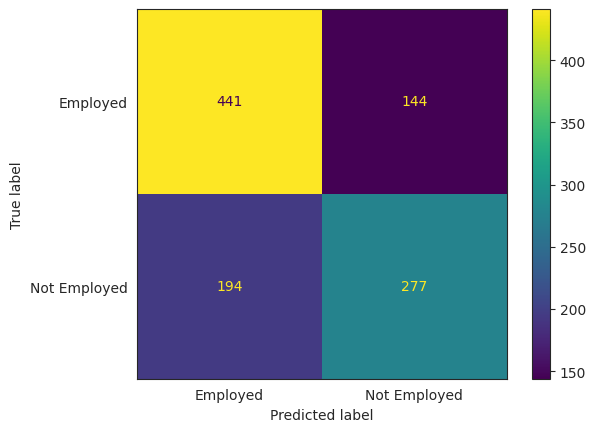

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,COMPAS,LogisticRegression,0.673606,0.677083,"{'max_iter': 50, 'penalty': 'l2', 'solver': 's..."
1,COMPAS,DecisionTreeClassifier,0.681328,0.689394,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
2,COMPAS,RandomForestClassifier,0.671051,0.677083,"{'max_depth': 4, 'max_features': 'auto', 'min_..."
3,COMPAS,XGBClassifier,0.686864,0.693182,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
4,COMPAS,KNeighborsClassifier,0.672014,0.679924,"{'metric': 'minkowski', 'n_neighbors': 15, 'we..."


In [81]:
ML_baseline_results_df, best_results_df = test_baseline_models(dataset, dataset_name=DATASET_NAME)
ML_baseline_results_df

In [82]:
best_results_df

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params,Model_Pred
0,COMPAS,XGBClassifier,0.686864,0.693182,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...","[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [83]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: LogisticRegression
{'max_iter': 50, 'penalty': 'l2', 'solver': 'saga'}


Model name: DecisionTreeClassifier
{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.6}


Model name: RandomForestClassifier
{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 20}


Model name: XGBClassifier
{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'objective': 'binary:logistic'}


Model name: KNeighborsClassifier
{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}


In [84]:
from datetime import datetime, timezone

now = datetime.now(timezone.utc)
date_time_str = now.strftime("%Y%m%d__%H%M%S")
ML_baseline_results_df.to_csv(os.path.join('results', 'models_tuning', f'tuning_results_{DATASET_NAME}_{date_time_str}.csv'),
                              sep=",", index=False, columns=ML_baseline_results_df.columns, float_format="%.4f")